#SIF Cyber Security Foundational Week 6 - IP Sniffing Detection

#Tracerouting

 Traceroute is a network diagnostic tool that can be used to identify the path that packets take through a network. By examining the IP addresses of the intermediate routers along the path, it may be possible to detect IP spoofing attempts.
 
In Python, you can use the scapy library to perform traceroutes and detect IP spoofing attempts. Here's an example code snippet:

This will send a series of packets to google.com with increasing TTL (Time to Live) values, starting at 1. Each router along the way that handles the packets will decrement the TTL value, and if it reaches 0, the router will send back an ICMP "Time Exceeded" message to the sender. By analyzing the IP addresses in these messages, the traceroute tool can determine the path that the packets took to reach the destination.

The output of the traceroute command will show the IP addresses of the routers that the packets passed through, along with their round-trip times. Here's an example output:

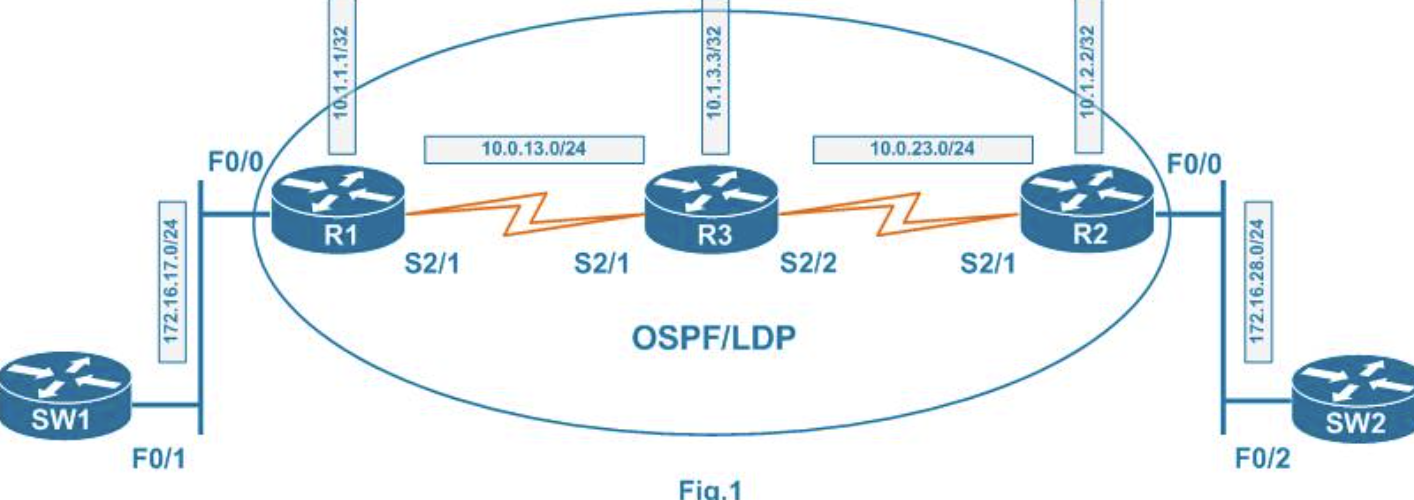

#Code for Tracerouting

In the example above, we first perform a traceroute to a website using the traceroute function from scapy. This function sends a series of packets to the target website and prints the results.

Next, we define a function detect_ip_spoof that takes a packet as an argument. This function checks if the source IP address of the packet is from a private IP range (which are commonly used for local networks) and prints a message if it is. This is a simple example of how you can detect IP spoofing attempts.

Finally, we use the sniff function from scapy to capture network traffic and pass it to the detect_ip_spoof function. This function will be called for every packet that is captured, allowing us to continuously monitor the network for potential IP spoofing attempts.

In [3]:
!pip install scapy

In [3]:
from scapy.all import *

# Perform a traceroute
traceroute_result = traceroute("www.google.com")

# Print the results
print(traceroute_result)

# Detect IP spoofing
def detect_ip_spoof(pkt):
    if IP in pkt:
        # Check if the source IP address is from a private IP range
        if pkt[IP].src.startswith("10.") or pkt[IP].src.startswith("172.16.") or pkt[IP].src.startswith("192.168."):
            print("Possible IP spoofing attempt detected from IP address: {}".format(pkt[IP].src))

# Sniff network traffic and pass it to the detect_ip_spoof function
sniff(prn=detect_ip_spoof)


#Pause and Think 🤔 

Based on the code above, what are some of the guidelines for password requirements? List them in the box below.

In [ ]:
#Type your response here. Running the code cell is not needed.







#Traceroute is a useful tool for troubleshooting network issues and tracing the path of packets through the network. Here are some tips for using traceroute effectively:


Start with the destination host: Begin by running traceroute to the destination host or IP address. This will give you a rough idea of the number of hops and the path taken by packets to reach the destination.

Look for patterns: Pay attention to any patterns or anomalies in the output of traceroute, such as long delays or dropped packets. These can indicate problems with specific network devices or links.

Use multiple probes: Try running traceroute multiple times to the same destination to get a more complete picture of the network path. You can also use multiple probes at once to get a more accurate view of the network topology.

Experiment with options: Traceroute has a number of options that can be used to customize its behavior, such as setting the maximum number of hops or adjusting the time-to-live (TTL) value. Experimenting with these options can help you better understand how packets are flowing through the network.

Interpret the output: Finally, it's important to know how to interpret the output of traceroute. This can involve understanding the various columns of data, such as the IP addresses of each hop, the round-trip time (RTT) for each probe, and any error messages that are generated.